# Análise descritiva para modelos de regressão

Nesse módulo discutiremos algumas técnicas de análise descritiva específicas para situações em que temos uma variável de interesse (variável resposta) contínua. É uma boa prática colocar a variável de interesse no eixo **Y** (vertical) de um gráfico de dispersão, deixando a variável explicativa no eixo **X** (horizontal).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fixing random state for reproducibility
np.random.seed(2360873)

,x,y
x,1.000000,0.984289
y,0.984289,1.000000


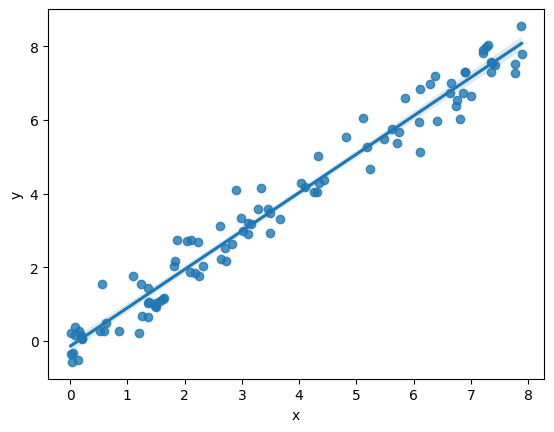

In [18]:
N = 100
x = 8*np.random.rand(N)
y = x + np.random.randn(N)*.5
df1 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df1)
df1.corr()

,x,y
x,1.000000,-0.967983
y,-0.967983,1.000000


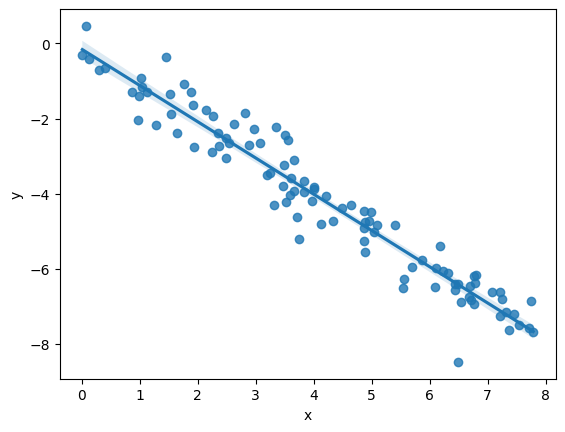

In [23]:
x = 8*np.random.rand(N)
y = -1*x + np.random.randn(N)*.5
df2 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df2)
df2.corr()

,x,y
x,1.000000,0.085719
y,0.085719,1.000000


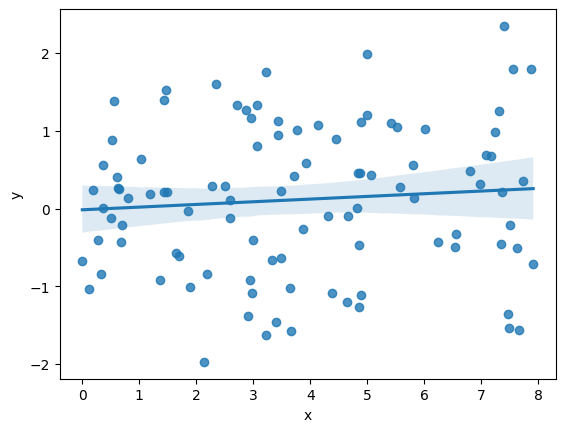

In [24]:
x = 8*np.random.rand(N)
y = np.random.randn(N)
df3 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df3)
df3.corr()

,x,y
x,1.000000,0.727384
y,0.727384,1.000000


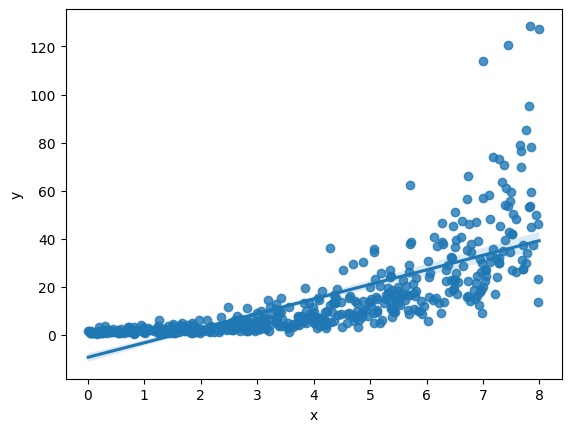

In [28]:
N = 500
x = 8*np.random.rand(N)
y = np.exp(.5*x + np.random.randn(N)*.5)
df4 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df4)
df4.corr()

,x,y
x,1.000000,0.065995
y,0.065995,1.000000


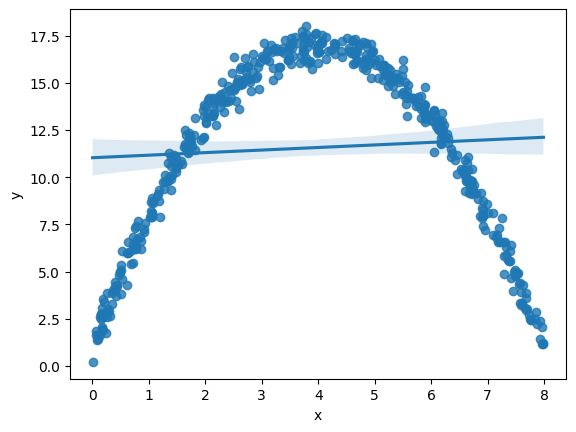

In [30]:
x = 8*np.random.rand(N)
y = 1 - x**2 + 8*x + np.random.randn(N)*.5
df5 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df5)
df5.corr()

,x,y
x,1.000000,-0.073034
y,-0.073034,1.000000


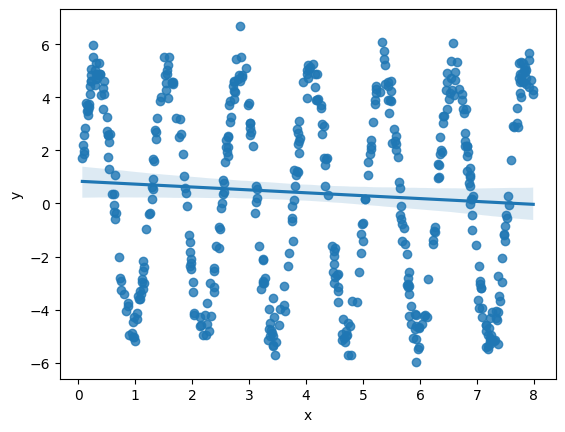

In [34]:
x = 8*np.random.rand(N)
y = np.sin(x*5)*5 + np.random.randn(N)*.5
df6 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df6)
df6.corr()

,x,y
x,1.000000,0.852629
y,0.852629,1.000000


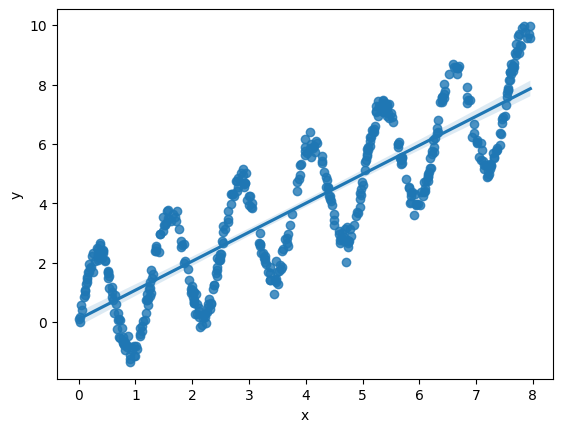

In [37]:
x = 8*np.random.rand(N)
y = x + np.sin(x*5)*2 + np.random.randn(N)*.2
df7 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df7)
df7.corr()

# Análise da estrutura de correlação de várias variáveis

Em um modelo de regressão, é importante avaliar a estrutura de correlação entre as variáveis explicativas. Nesse contexto, podemos entender a correlação como um 'compartilhamento de informação'. Por exemplo, se temos duas variáveis explicativas com correlação igual a 1, certamente podemos eliminar uma delas no modelo. Vamos discutir em detalhes a influência de casos mais intermediários em modleos lineares mais adiante. Por hora vamos avaliar métodos de identificar esses padrões. 

#### Matriz de dispersão

Já vimos como fazer esse tipo de gráfico, e que pode ser muito útil. Sua desvantagem é quando temos muitos pontos e muitas variáveis, ele pode não ser tão prático.

In [38]:
penguins = sns.load_dataset("penguins")

In [40]:
penguins.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


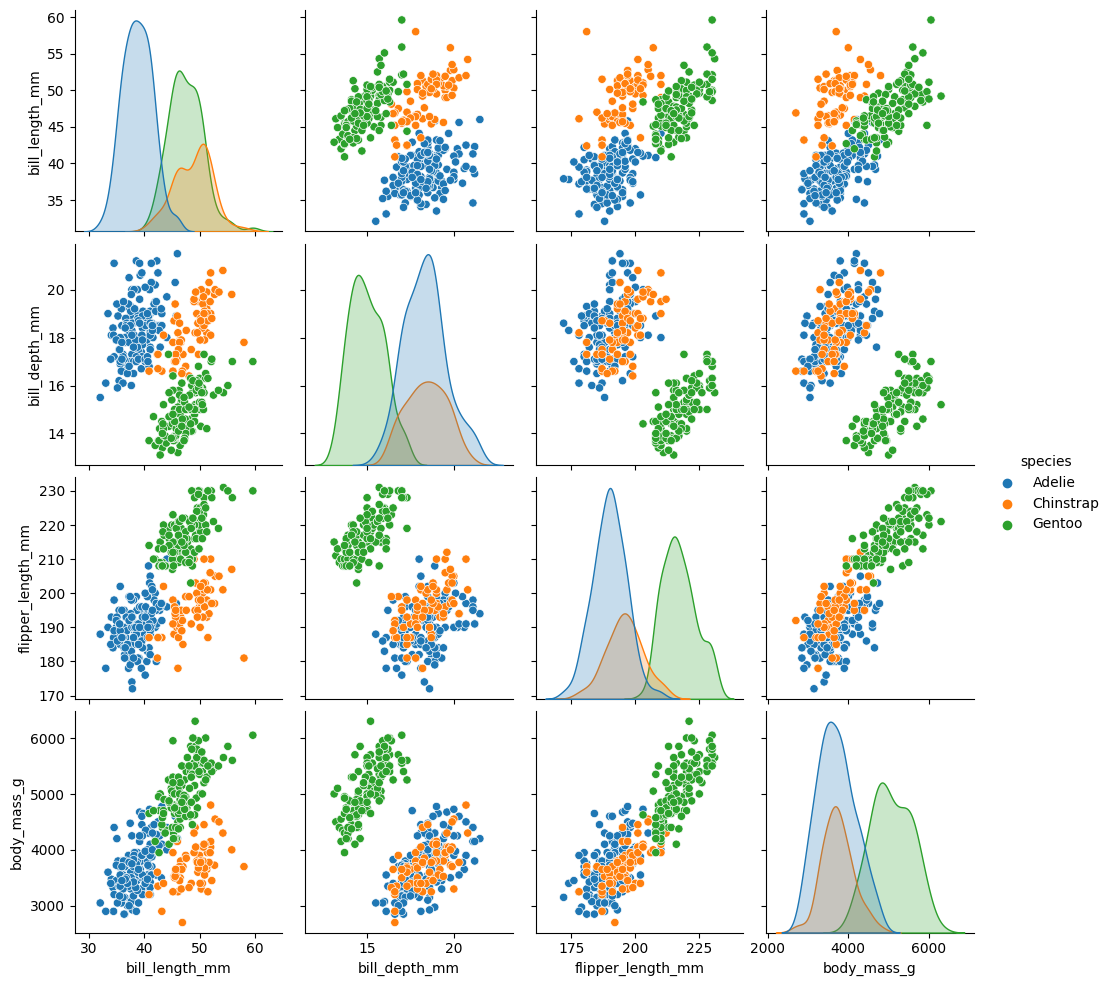

In [42]:
sns.pairplot(penguins, hue='species');

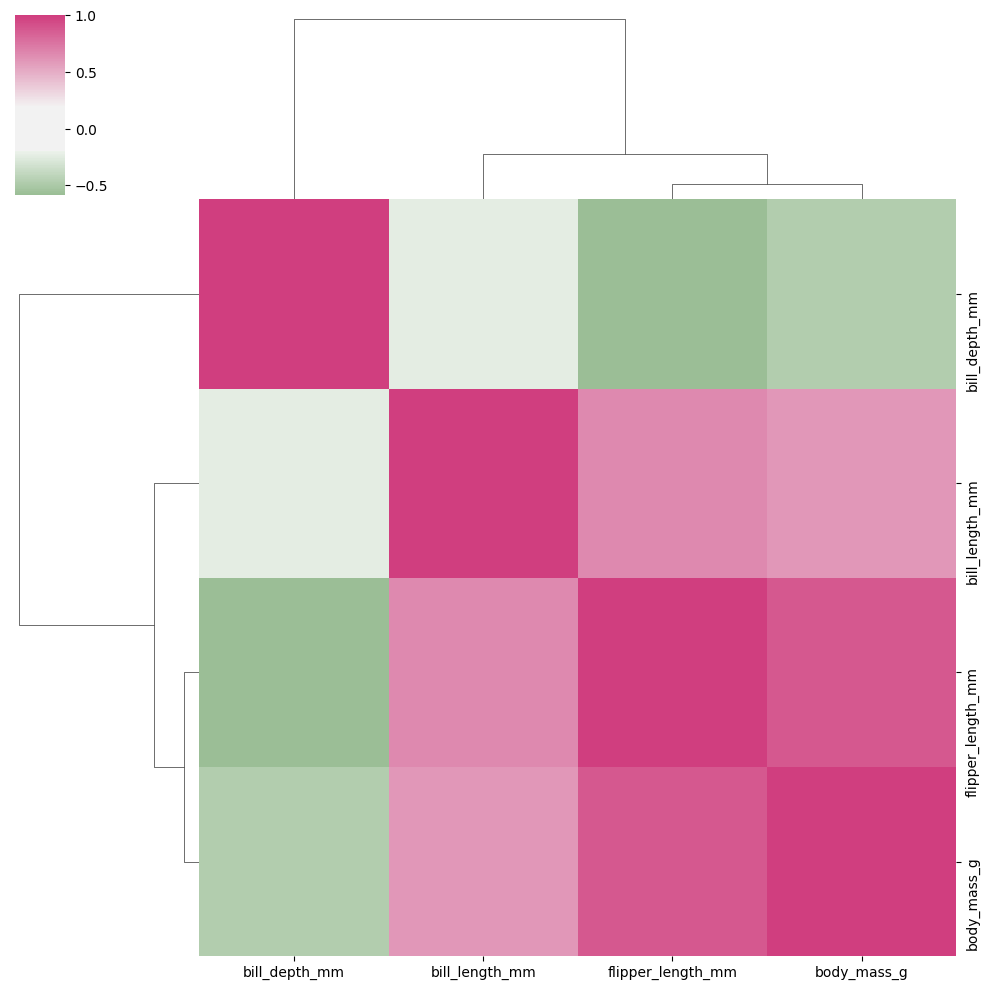

In [53]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 50, center = 'light')

sns.clustermap(penguins.corr(numeric_only=True), figsize=(10, 10), center = 0, cmap=cmap);

# Análise descritiva para modelos de regressão

Nesse módulo discutiremos algumas técnicas de análise descritiva específicas para situações em que temos uma variável de interesse (variável resposta) contínua. É uma boa prática colocar a variável de interesse no eixo **Y** (vertical) de um gráfico de dispersão, deixando a variável explicativa no eixo **X** (horizontal).

### Pontos discrepantes - *Outlier*

**O que é um *outlier*?**  
De forma intuitiva, é uma observação com valor muito *diferente* das demais. Esse *diferente* pode ter vários significados, em que destaco dois:

- Outlier univariado: uma observação em que o valor de uma variável é bem mais distante da média que as demais observações - poderiamos citar uma pessoa com altura de 2,1 metros.   
- Outlier multivariado: uma observação sem necessariamente um valor isolado que chame a atenção, mas com uma combinação de variáveis com valores 'estranhos' como altura = 1,85 metros e peso = 55 Kg. Isoladamente os valores podem ser relativamente comuns, mas devido a uma estrutura de correlação natural entre as variáveis, a combinação se torna bastante incomum.

**Por que ocorre um outlier?**  
Outliers podem ocorrer por diversos motivos, incluindo erro nos dados, uma observação realmente diferente (eu 
gosto de pensar que se o Silvio Santos estiver na minha base, na maioria dos casos será um outlier), ou é comum também assimetrias causarem a "impressão" de outliers. Vamos discutir assimetria mais adiante.

**Qual a consequência de um outlier?**  
As consequências mais comuns são distorções dos dados. Valores muito altos tendem a deslocar a média para cima, inflacionar a variância e eventualmente ser **pontos influentes** em modelos de regressão.

Vamos ver um exemplo bem simples.

,x,y
x,1.000000,-0.986877
y,-0.986877,1.000000


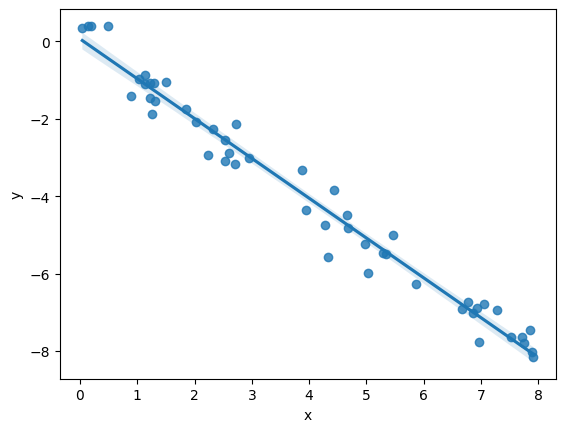

In [72]:
N = 50
x = 8*np.random.rand(N)
y = -1*x + np.random.randn(N)*.4
df8 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df8)
df8.corr()

,x,y
x,1.000000,-0.422939
y,-0.422939,1.000000


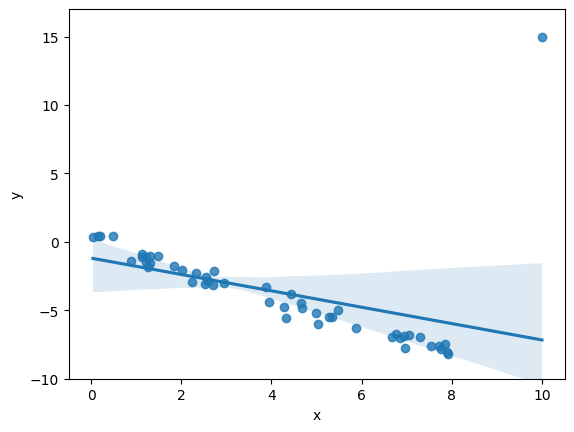

In [73]:
df8.iloc[10,0] = 10
df8.iloc[10,1] = 15

_ = sns.regplot(x='x', y='y', data = df8)
plt.xlim(-.5, 10.5)
plt.ylim(-10, 17)
df8.corr()

### Consequências

Repare esse outlier introduzido artificialmente, e na influência que ele teve no coeficiente de correlação e na reta de tendência (falaremos mais dessa reta adiante, ficamos por enquanto com o conceito intuitivo dela).

**O que fazer**?

Outliers podem ter influências importantes sobre modelos, cabendo sempre um julgamento subjetivo que deve ser ponderado dependendo da situação. Algumas alternativas comuns ao se lidar com outliers são:

- **Remover da análise**: Essa alternativa pode remover a influência do outlier da amostra, é interessante se pensarmos principalmente que o outlier é proveniente de um erro de digitação. Mesmo quando o ponto é de fato um ponto aberrante, a nossa análise pode resultar em um ajuste melhor para "a maioria" dos pontos sem o ponto aberrante do que com a presença dele.

- **Utilizar uma técnica robusta**: técnicas robustas se baseiam em estratégias para dar 'menos influência' a valores discrepantes. Existem várias delas, vamos discutir a técnica baseada nos *rankings* (alguns autores traduzem para "postos"). Um ranking se obtém ordenando-se a base de dados pelo valor da variável, e utilizando o índice ordinal da variável (de 1 a N: 1 para o menor, 2 para o segundo menor, etc até N para o maior valor). Ao utilizarmos *rankings*, não temos mais a influência de outliers - embora perca-se informação da variável - ou seja, há prós e contras na técnica.

- **Utilizar uma transformação na variável resposta**: uma transformação que merece destaque é o *LOG*, pois transforma uma característica aditiva em multiplicativa. Se pensarmos em uma bactéria em ambiente propício, que se divide em 2 a cada período, vamos observar a quantidade de bactérias e o seu logaritmo na base 2 assim:

| tempo | número de bactérias | $log_2$(número) |
|-|-|-|
| 1 | 1 | 0 |
| 2 | 2 | 1 |
| 3 | 4 | 2 |
| 4 | 8 | 3 |
| 5 | 16 | 4 |
| 6 | 32 | 5 |

Repare que $2^2=1$ implica em $log_2(2)= 1$. Repare também que a série no log tem sempre incrementos constantes, ao passo que a série do número de bactérias sempre dobra a cada passo. É isso o que o log faz: transforma uma característica multiplicativa em aditiva.

Várias quantidades tem natureza multiplicativa. Destaco o dinheiro: se aplicamos 100 dinheiros a 1% de taxa, temos 101 dinheiros no final do período. Aplicando 1000 dinhieiros na mesma taxa, temos 1010 dinheiros no final do período. O log tem um efeito muito interessante em variáveis assim.

OBS: Em geral usa-se a base neperiana para o log, mas o mesmo ocorre 

In [74]:
df8.drop(index=10, inplace=True)

-0.9865281623888106

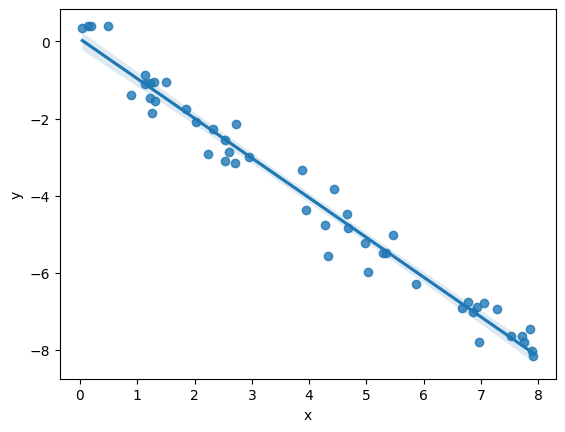

In [79]:
_ = sns.regplot(x='x', y='y', data = df8)
np.corrcoef(df8.iloc[:,0],df8.iloc[:,1])[0,1]

O exemplo abaixo possui a variável ```y``` assimétrica (com valores altos sendo observados mais longe da média). Um método comum como o do boxplot indicaria diversos outliers. Podemos utilizar os ranks para avaliar a associação de forma robusta, ou seja, sem que os outliers tenham grande impacto sobre a análise.

,x,y
x,1.000000,0.745031
y,0.745031,1.000000


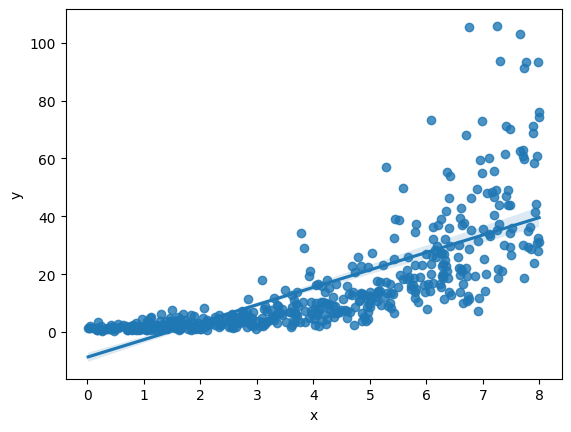

In [80]:
N = 500
x = 8*np.random.rand(N)
y = np.exp(.5*x + np.random.randn(N)*.5)
df4 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df4)
df4.corr()

In [82]:
df4_rank = pd.concat([df4, df4.rank()], axis = 1)

df4_rank.columns = ['x', 'y', 'x_rank', 'y_rank']
df4_rank

,x,y,x_rank,y_rank
0,3.140305,2.758192,204.0,138.0
1,6.621288,20.985801,418.0,381.0
2,0.831122,2.185838,51.0,110.0
3,2.799732,3.650971,183.0,166.0
4,1.582989,1.928403,109.0,95.0
...,...,...,...,...
495,0.772106,0.938142,44.0,19.0
496,6.301392,23.442229,394.0,395.0
497,5.763888,16.372705,357.0,345.0
498,7.155074,48.540469,449.0,466.0


,x,y,x_rank,y_rank
x,1.000000,0.745031,0.999491,0.913189
y,0.745031,1.000000,0.741404,0.818976
x_rank,0.999491,0.741404,1.000000,0.912001
y_rank,0.913189,0.818976,0.912001,1.000000


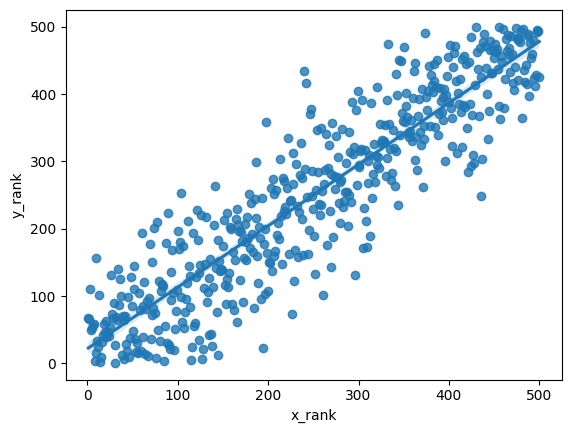

In [83]:
_ = sns.regplot(x='x_rank', y='y_rank', data = df4_rank)
df4_rank.corr()

#### Logaritmo

| tempo | Número de bactérias | $$LOG _2$$ |
|-|-|-|
| 1 | 1 | 0 |
| 2 | 2 | 1 |
| 3 | 4 | 2 |
| 4 | 8 | 3 |
| 5 | 16 | 4 |
| 6 | 32 | 5 |
| 2 | 64 | 6 |







,x,y,log_y
x,1.000000,0.745031,0.908349
y,0.745031,1.000000,0.837060
log_y,0.908349,0.837060,1.000000


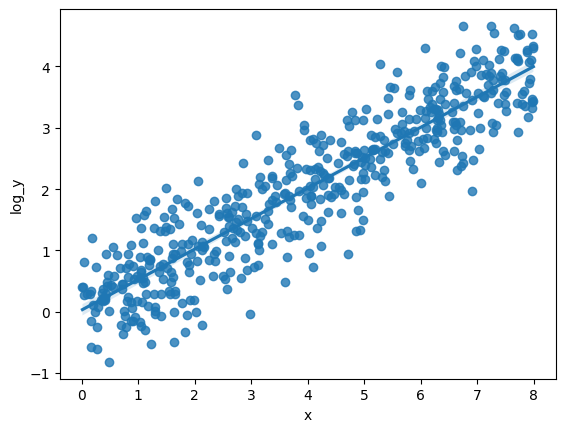

In [86]:
df4_log = df4.copy()
df4_log['log_y'] = np.log(df4_log['y'])

_ = sns.regplot(x='x', y='log_y', data = df4_log)
df4_log.corr()